In [65]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-market-small-wide-dataset/bar.csv
/kaggle/input/stock-market-small-wide-dataset/rating.csv
/kaggle/input/stock-market-small-wide-dataset/bar-S.csv
/kaggle/input/stock-market-small-wide-dataset/quote-S.csv
/kaggle/input/stock-market-small-wide-dataset/target.csv
/kaggle/input/stock-market-small-wide-dataset/news.csv
/kaggle/input/stock-market-small-wide-dataset/quote.csv
/kaggle/input/stock-market-small-wide-dataset/event.csv


Use only Bar-S and Quote-S datasets. Do not consider any single stock or day for any analysis. A day means no specific day, generalize it. Split a day in a 10 minutes window, like 30 windows in 5 hours of any day. Expected to finish the 8 tasks in 3 days, maximum 5 days.

##### Make clusters (N1) based on ticker/symbol and price for bar. Value of N1?
##### Instead of price, consider return to get clusters N2. Use the quote dataset. Value of N2?
##### list out the stocks, cluster wise. Consider N1 only.
##### N3, cluster based on bid_size and  ticker/symbol. How bid_size in each cluster of N3 is distributed in a day? 
##### how the price change and size is distributed? bid only from the quote dataset.
##### how volatility and size are distributed across a day? Bid only from the quote dataset.
##### cumulative bid_size in a day and compare with volume from bar dataset. Make the average of all stocks in any cluster. Show for all clusters of N1. 
##### Optimize N1, by ARIMA, GARCH and LSTM accuracy. Can you identify a stock from user input in which cluster?

In [66]:
bar_s = pd.read_csv("/kaggle/input/stock-market-small-wide-dataset/bar-S.csv")
quote_s = pd.read_csv("/kaggle/input/stock-market-small-wide-dataset/quote-S.csv")

In [67]:
bar_s

,time,symbol,volume,accumulated_volume,VWAP,open_price,high_price,low_price,close_price,average_price,epoch_time_at_the_beginning,epoch_time_at_the_ending
0,2020-09-11 21:41:00+00:00,GOOGL,174,79270,1515.5786,1515.720,1515.720,1515.720,1515.720,1519.4544,1599860460000,1599860520000
1,2020-09-11 21:27:00+00:00,AAPL,100,3503661,111.9790,111.979,111.979,111.979,111.979,111.8497,1599859620000,1599859680000
2,2020-09-11 21:21:00+00:00,AAPL,100,3503561,111.8410,111.841,111.841,111.841,111.841,111.8497,1599859260000,1599859320000
3,2020-09-11 21:16:00+00:00,AAPL,368,3503461,111.8932,111.901,111.901,111.884,111.884,111.8497,1599858960000,1599859020000
4,2020-09-11 21:07:00+00:00,AAPL,100,3503093,112.0010,112.001,112.001,112.001,112.001,111.8497,1599858420000,1599858480000
...,...,...,...,...,...,...,...,...,...,...,...,...
381590,2020-08-03 14:46:00+00:00,AON,400,31618,203.8500,203.850,203.850,203.850,203.850,204.6909,1596465960000,1596466020000
381591,2020-08-03 14:46:00+00:00,SNA,400,19194,141.3825,141.445,141.445,141.320,141.320,142.6549,1596465960000,1596466020000
381592,2020-08-03 14:46:00+00:00,DLR,400,53348,160.3400,160.375,160.375,160.305,160.305,160.8408,1596465960000,1596466020000
381593,2020-08-03 14:46:00+00:00,GPC,400,8580,91.1325,91.175,91.175,91.090,91.090,90.8993,1596465960000,1596466020000


In [68]:
quote_s

,time,ticker,bid_price,bid_size,ask_price,ask_size
0,2020-09-11 19:59:59+00:00,QRVO,122.82,7,123.25,8
1,2020-09-11 19:59:15+00:00,FIS,144.14,7,144.64,5
2,2020-09-11 19:59:10+00:00,GRMN,100.00,6,100.13,6
3,2020-09-11 19:47:08+00:00,V,200.82,6,201.23,8
4,2020-09-11 19:47:00+00:00,V,200.74,5,201.23,8
...,...,...,...,...,...,...
68836,2020-08-04 18:55:04+00:00,AXP,92.76,5,92.97,5
68837,2020-08-04 18:54:18+00:00,AXP,92.73,5,92.96,5
68838,2020-08-04 18:54:17+00:00,AXP,92.70,5,92.96,5
68839,2020-08-04 18:52:47+00:00,AXP,92.67,5,92.91,5


In [69]:
bar_s['average_price'].nunique()

334592

In [70]:
X = bar_s[['average_price']]

In [71]:
X

,average_price
0,1519.4544
1,111.8497
2,111.8497
3,111.8497
4,111.8497
...,...
381590,204.6909
381591,142.6549
381592,160.8408
381593,90.8993


In [95]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 10)

In [96]:
kmeans.fit(X)

KMeans(n_clusters=10)

In [97]:
#kmeans.cluster_centers_

array([[ 105.5351886 ],
       [1561.33895049],
       [3961.03879283],
       [ 308.96613902],
       [ 210.12214275],
       [3184.24170078],
       [ 649.87417086],
       [1136.3846565 ],
       [ 151.40274976],
       [ 438.09634898]])

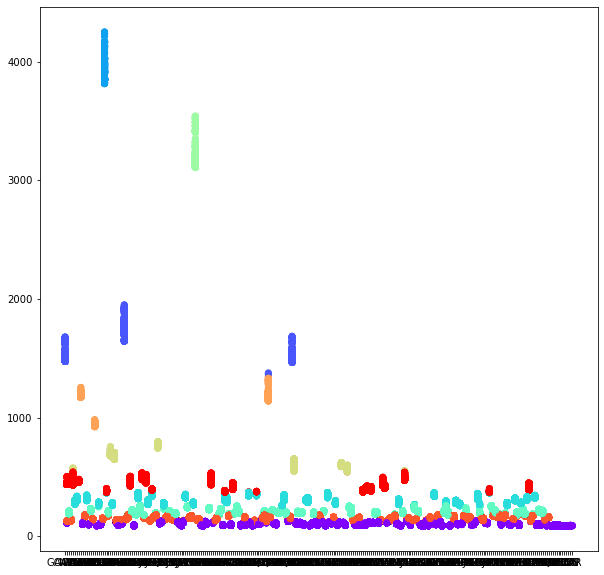

In [98]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize = (10,10))
centroids = kmeans.cluster_centers_
plt.scatter(bar_s['symbol'],X, c = kmeans.labels_, cmap ="rainbow")
plt.show()

In [75]:
centroids

array([[ 150.83807964],
       [3184.24170078],
       [1561.33895049],
       [ 434.80582037],
       [ 302.74417119],
       [3961.03879283],
       [ 649.64720652],
       [ 105.88218104],
       [1136.3846565 ],
       [ 206.57157108]])

In [76]:
bar_s['symbol'].nunique()

258

In [77]:
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
kmeans = KMeans(n_clusters=10, max_iter=1000)
pipeline = make_pipeline(normalizer,kmeans)

In [78]:
quote = pd.read_csv("/kaggle/input/stock-market-small-wide-dataset/quote.csv")

In [79]:
quote

,time,ticker,bid_price,bid_size,ask_price,ask_size
0,2020-08-05 21:57:02+00:00,BDX,284.24,1,283.97,1
1,2020-08-05 20:59:07+00:00,COST,343.60,1,358.23,1
2,2020-08-05 20:58:46+00:00,COST,345.76,2,358.23,1
3,2020-08-05 20:58:25+00:00,COST,345.76,1,358.23,1
4,2020-08-05 20:58:15+00:00,BA,173.30,1,180.63,1
...,...,...,...,...,...,...
2158859,2020-08-05 13:32:02+00:00,CCL,13.96,29,13.92,30
2158860,2020-08-05 13:32:02+00:00,CCL,13.96,29,13.85,16
2158861,2020-08-05 13:32:02+00:00,CCL,13.96,29,13.98,18
2158862,2020-08-05 13:32:02+00:00,CCL,13.96,29,13.95,14


In [80]:
!pip install kmodes

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [81]:
import kmodes

In [82]:
from kmodes.kmodes import KModes

In [83]:
clus = bar_s[['symbol','close_price']]

In [84]:
km_cao = KModes(n_clusters=10, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(clus)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 23, cost: 736637.0


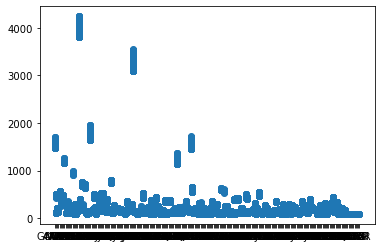

In [85]:

plt.scatter(bar_s['symbol'],bar_s['close_price'], cmap = "rainbow")
plt.show()

In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [87]:
le.fit(bar_s['symbol'])

LabelEncoder()

In [88]:
int_symbol = le.transform(bar_s['symbol'])

In [89]:
X1 = pd.DataFrame(data = (int_symbol,bar_s['close_price']))
X1 = X1.T
kmeans1 = KMeans(n_clusters = 20)
kmeans1.fit(X1)

KMeans(n_clusters=20)

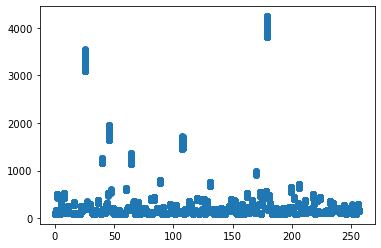

In [90]:
plt.scatter(X1.iloc[ : ,0:1],X1.iloc[ : ,1:2], cmap ="rainbow")
plt.show()

In [99]:
y = quote_s[['ticker','bid_size']]

In [101]:
km_cao1 = KModes(n_clusters=20, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao1.fit_predict(y)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2104, cost: 32794.0


In [102]:
figure(figsize = (15,10))
plt.scatter(y['ticker'],y['bid_size'], cmap = "rainbow")
plt.show()

,ticker,bid_size
0,QRVO,7
1,FIS,7
2,GRMN,6
3,V,6
4,V,5
...,...,...
68836,AXP,5
68837,AXP,5
68838,AXP,5
68839,AXP,5
